# Finding Duplicated Images & Near Duplicates

SentenceTransformers provides models that allow to embed images and text into the same vector space. This allows to find similar images as similar images or texts are projected into the same vector space.




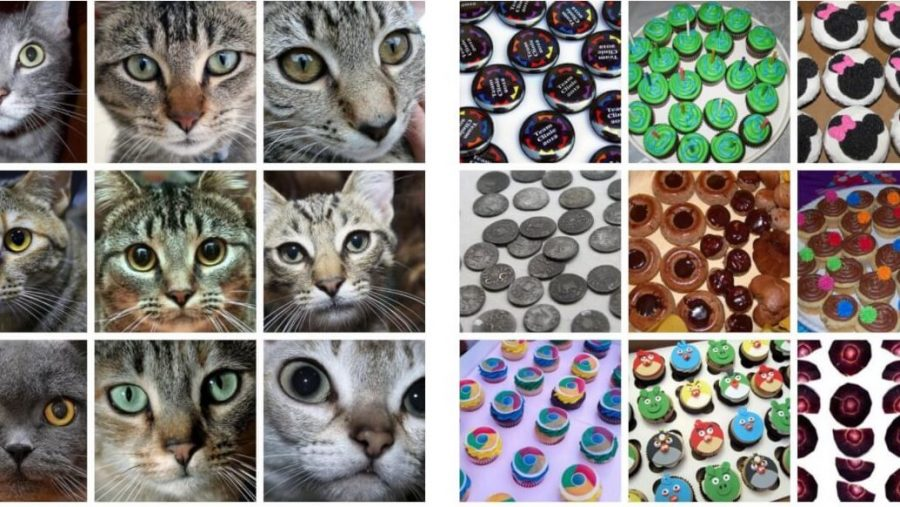

we use the OpenAI CLIP Model, which was trained on a large set of images and image alt texts.

https://github.com/openai/CLIP

we use the Unsplash Dataset Lite, which contains about 25k images.

https://unsplash.com/data

https://github.com/unsplash/datasets

http://sbert.net/datasets/

https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
%pip install sentence_transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import matplotlib.pyplot as plt
import glob
import torch
import os

In [ ]:
!wget https://public.ukp.informatik.tu-darmstadt.de/reimers/sentence-transformers/datasets/unsplash-25k-photos.zip

In [ ]:
!unzip 'unsplash-25k-photos.zip' -d 'photos'

In [ ]:
img_names = list(glob.glob('photos/*.jpg'))[:2000]
print(len(img_names))

2000


In [ ]:
model = SentenceTransformer('clip-ViT-B-32')
img_embed = model.encode([Image.open(img) for img in img_names], batch_size=32, convert_to_tensor=True)

In [ ]:
duplicates = util.paraphrase_mining_embeddings(img_embed, top_k=5)

0.9793906211853027


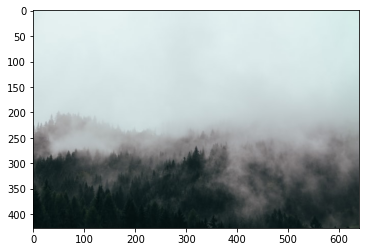

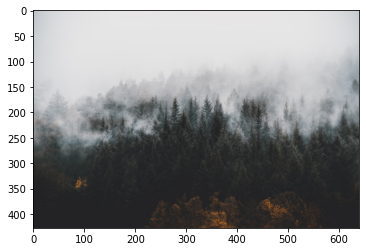

-------------------------------



0.9750251173973083


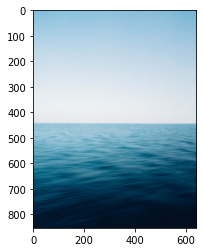

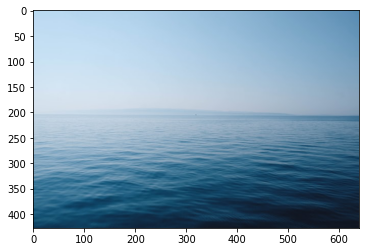

-------------------------------



0.9679796099662781


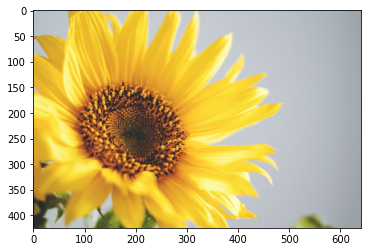

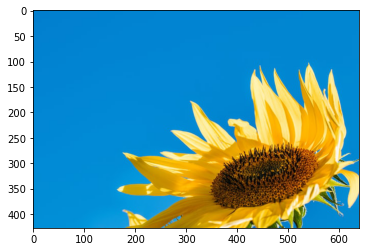

-------------------------------



0.9678823351860046


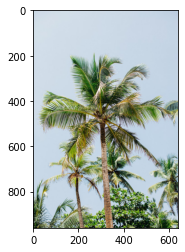

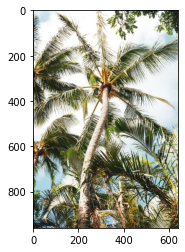

-------------------------------



0.9672272205352783


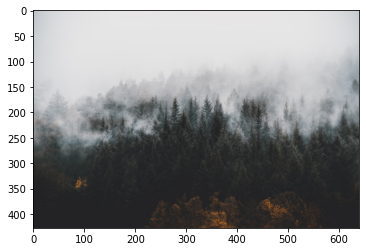

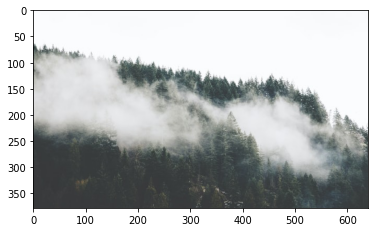

-------------------------------



0.9671919941902161


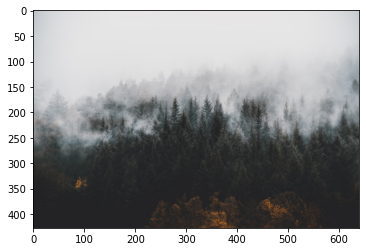

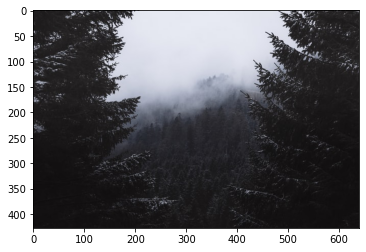

-------------------------------



0.9667988419532776


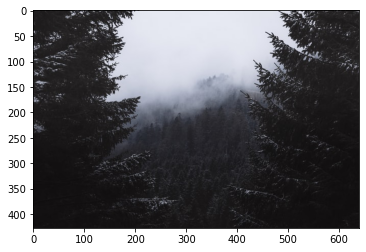

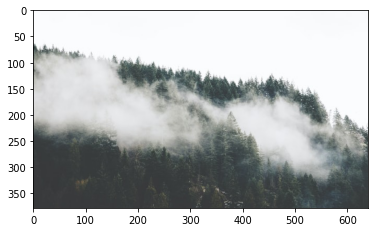

-------------------------------



0.9659923911094666


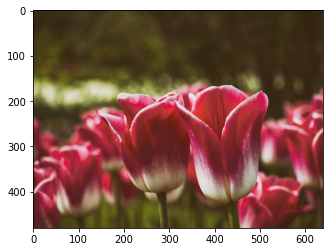

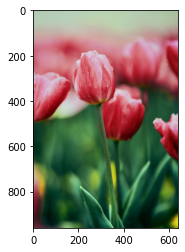

-------------------------------



0.9648415446281433


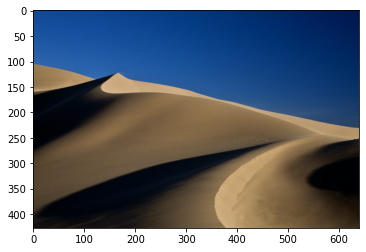

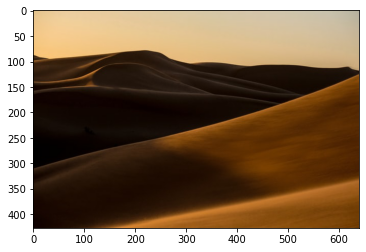

-------------------------------



0.9644808769226074


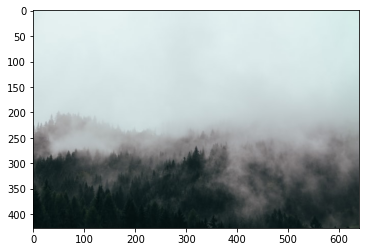

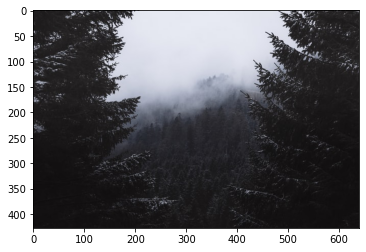

-------------------------------





In [ ]:
for score, idx1, idx2 in duplicates[0:10]:
  print(score)
  img_path = img_names[idx1]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  img_path = img_names[idx2]
  im = Image.open(img_path)
  plt.figure()
  plt.imshow(im)
  plt.show()

  print("-------------------------------\n\n\n")

